In [25]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd

In [26]:
# Read the shapefile

# Flooded = 0 indicates not flooded location while Flooded = 1 indicates flooded location
## flood predictory features for amibara.
df=gpd.read_file("points_data.shp")
df.head()

,id,label,DEM,Slope,Aspect,Curvature,Soil_Test,CN,TWI,Rainfall,LULC,Soil_Text,geometry
0,0,0,810,4.124518,56.309933,1.28,0,71,7.651444,8.634620,30,7,POINT (648355.689 1032128.503)
1,1,0,798,1.811248,288.434937,-0.64,0,71,6.457982,9.113000,30,7,POINT (652338.758 1039898.468)
2,2,0,783,2.429397,45.000000,-1.28,0,71,8.626627,14.380471,30,7,POINT (654594.349 1045368.461)
3,3,0,845,0.810231,225.000000,-0.00,0,71,11.018336,9.009209,30,7,POINT (653891.492 1031276.320)
4,4,0,803,1.811248,108.434952,-0.64,0,71,7.151129,11.598495,30,7,POINT (657859.303 1042542.024)


In [27]:
df= df.drop(labels = ["id","Soil_Test"], axis=1)

In [28]:
print(df.describe().T)  #Values are already normalized in GIS before fitting. 

           count          mean           std           min         25%  \
label      393.0  6.921120e-01  4.622084e-01  0.000000e+00    0.000000   
DEM        393.0  7.298244e+02  4.759590e+01  6.960000e+02  706.000000   
Slope      393.0  4.342038e+00  5.112538e+00  0.000000e+00    1.811248   
Aspect     393.0 -7.185369e+02  2.907206e+03 -9.999000e+03   71.565048   
Curvature  393.0  7.002544e-02  8.639245e-01 -2.560000e+00   -0.640000   
CN         393.0  6.035623e+01  1.044618e+01  3.000000e+01   58.000000   
TWI        393.0 -1.731717e+20  2.424395e+21 -3.402823e+22    6.958297   
Rainfall   393.0  1.191060e+01  2.368298e+00  6.662645e+00   10.237988   
LULC       393.0  4.208651e+01  2.634587e+01  2.000000e+01   20.000000   
Soil_Text  393.0  4.175573e+00  1.418613e+00  1.000000e+00    4.000000   

                  50%         75%          max  
label        1.000000    1.000000     1.000000  
DEM        715.000000  728.000000  1042.000000  
Slope        2.918995    4.573921    3

In [29]:
#check that there is no no data values in the dataset
print(df.isnull().sum())
#df = df.dropna() # use this to remove rows with no data values 

label        0
DEM          0
Slope        0
Aspect       0
Curvature    0
CN           0
TWI          0
Rainfall     0
LULC         0
Soil_Text    0
geometry     0
dtype: int64


In [30]:
df = df.rename(columns={'label':'Class'})
print(df.dtypes)
df

Class           int64
DEM             int64
Slope         float64
Aspect        float64
Curvature     float64
CN              int64
TWI           float64
Rainfall      float64
LULC            int64
Soil_Text       int64
geometry     geometry
dtype: object


,Class,DEM,Slope,Aspect,Curvature,CN,TWI,Rainfall,LULC,Soil_Text,geometry
0,0,810,4.124518,56.309933,1.28,71,7.651444,8.634620,30,7,POINT (648355.689 1032128.503)
1,0,798,1.811248,288.434937,-0.64,71,6.457982,9.113000,30,7,POINT (652338.758 1039898.468)
2,0,783,2.429397,45.000000,-1.28,71,8.626627,14.380471,30,7,POINT (654594.349 1045368.461)
3,0,845,0.810231,225.000000,-0.00,71,11.018336,9.009209,30,7,POINT (653891.492 1031276.320)
4,0,803,1.811248,108.434952,-0.64,71,7.151129,11.598495,30,7,POINT (657859.303 1042542.024)
...,...,...,...,...,...,...,...,...,...,...,...
388,1,719,0.000000,-9999.000000,-0.00,30,9.554776,10.237988,90,1,POINT (634272.168 1036892.731)
389,1,720,1.811248,161.565048,-0.64,30,6.938687,10.237988,30,1,POINT (634203.006 1037288.382)
390,1,721,0.000000,-9999.000000,-0.00,58,7.469123,10.237988,40,4,POINT (632194.606 1037854.806)
391,1,715,0.000000,-9999.000000,-0.00,58,14.062859,14.165248,90,4,POINT (635526.358 1042630.752)


<Axes: xlabel='Class', ylabel='count'>

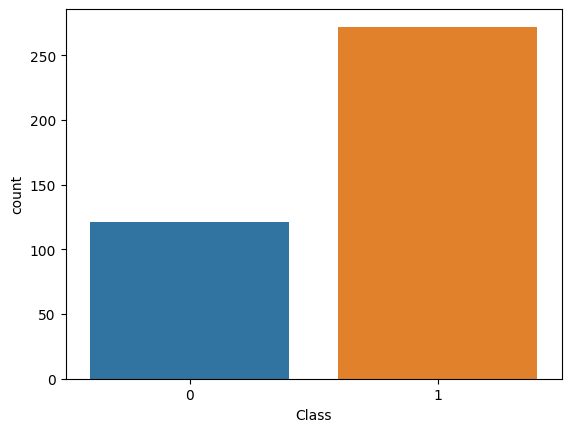

In [31]:
#Understand the data 
# The dataset includes the same number of flooded and not flooded locations
sns.countplot(x="Class", data=df) #0 - Notflooded   1 - Flooded

In [32]:
print(df.dtypes)

Class           int64
DEM             int64
Slope         float64
Aspect        float64
Curvature     float64
CN              int64
TWI           float64
Rainfall      float64
LULC            int64
Soil_Text       int64
geometry     geometry
dtype: object


<Axes: xlabel='Class', ylabel='count'>

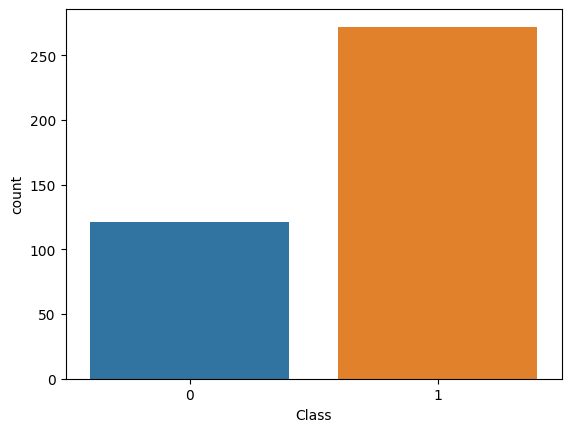

In [33]:
import seaborn as sns
#Understand the data 
# The dataset includes the same number of flooded and not flooded locations
sns.countplot(x="Class", data=df) #0 - Notflooded   1 - Flooded

<Axes: >

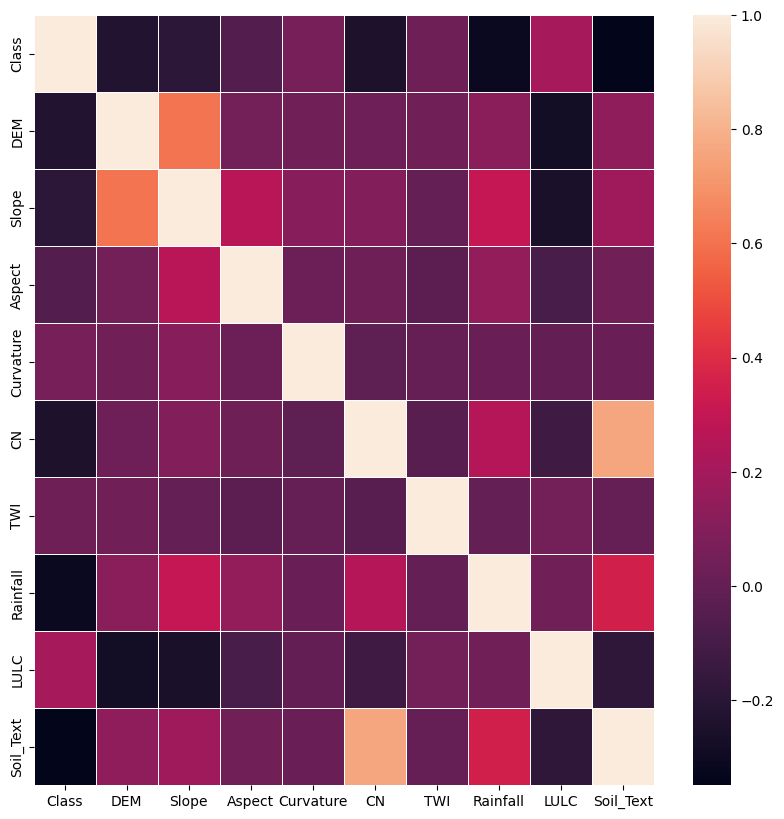

In [34]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'df' is your DataFrame
# # Check data types
# print(df.dtypes)

# # Drop non-numeric columns if needed
# df_numeric = df.select_dtypes(include='number')

# # Calculate the correlation matrix
# corrMatrix = df_numeric.corr()

# # Create a heatmap
# fig, ax = plt.subplots(figsize=(10, 10))
# sns.heatmap(corrMatrix, annot=True, cmap="coolwarm", linewidths=.5, ax=ax)

# plt.show()
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corrMatrix = numeric_df.corr()

# Now you can create the heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrMatrix, annot=False, linewidths=.5, ax=ax)

In [35]:
#Define the dependent variable that needs to be predicted (FSM)
Y = df["Class"].values

In [36]:
#Define the dependent variable that needs to be predicted (labels)
Y = df["Class"].values

#Define the independent variables. Let's also drop gemotry and label
X = df.drop(labels = ["Class", "geometry"], axis=1) 
features_list = list(X.columns)  #List features so we can rank their importance later 

In [37]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [38]:
#Split data into train (60 %), validate (20 %) and test (20%) to verify accuracy after fitting the model.
# training data is used to train the model
# validation data is used for hyperparameter tuning
# testing data is used to test the model

from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True, random_state=100)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25,shuffle=True, random_state=100)

In [39]:
X

,DEM,Slope,Aspect,Curvature,CN,TWI,Rainfall,LULC,Soil_Text
0,810,4.124518,56.309933,1.28,71,7.651444,8.634620,30,7
1,798,1.811248,288.434937,-0.64,71,6.457982,9.113000,30,7
2,783,2.429397,45.000000,-1.28,71,8.626627,14.380471,30,7
3,845,0.810231,225.000000,-0.00,71,11.018336,9.009209,30,7
4,803,1.811248,108.434952,-0.64,71,7.151129,11.598495,30,7
...,...,...,...,...,...,...,...,...,...
388,719,0.000000,-9999.000000,-0.00,30,9.554776,10.237988,90,1
389,720,1.811248,161.565048,-0.64,30,6.938687,10.237988,30,1
390,721,0.000000,-9999.000000,-0.00,58,7.469123,10.237988,40,4
391,715,0.000000,-9999.000000,-0.00,58,14.062859,14.165248,90,4


In [40]:
# SVM
from sklearn.svm import SVC
model = SVC(kernel='rbf',probability=True) # I am using the default values of the parameters.

# Train the model on training data
model.fit(X_train, y_train)

SVC(probability=True)

In [41]:
# make prediction for the test dataset.
prediction = model.predict(X_test)

# The prediction values are either 1 (Flooded) or 0 (Non-Flooded) 
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

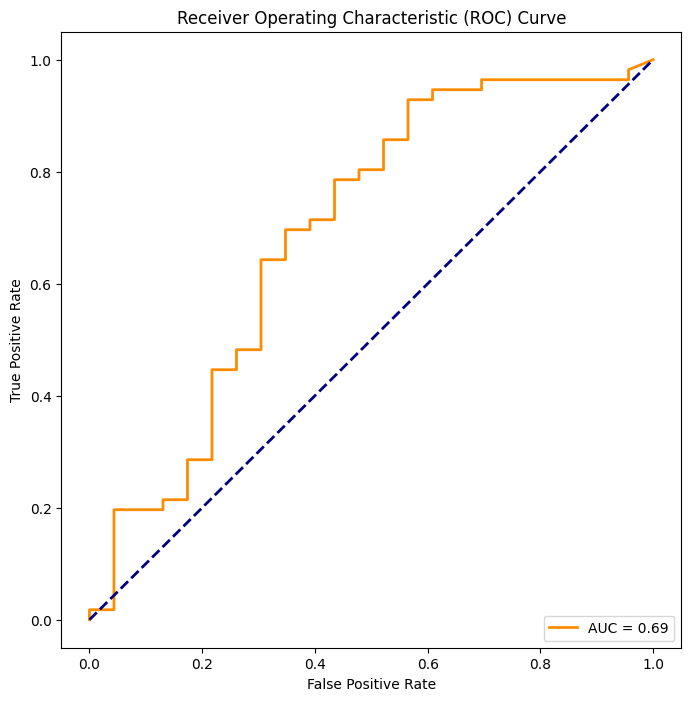

In [42]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a trained classifier named 'model'
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Map the whole study area

In [45]:
# Read shapefile for the whole study area
df_SA=gpd.read_file("Study_area_AN.shp")

# # Add attribute table from points to study area
# df_SA['label']=df['label']
# df_SA['DEM']=df['DEM']
# df_SA['Slope']=df['Slope']
# df_SA['Aspect']=df['Aspect']
# df_SA['Curvature']=df['Curvature']
# # Aggregate the points in to a single polygon representing the study area
# df_SA['geometry']=df.geometry.unary_union.convex_hull

df_SA.head() # make sure that the dataset has the same column arrangement as the training dataset

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,TYPE_3,...,Slope,Aspect,Curvature,Soil_Test,CN,TWI,Rainfall,LULC,Soil_Text,geometry
0,74,ETH,Ethiopia,2,Afar,10,Zone 3,42,Amibara,Woreda,...,2.290610,270.0,-0.64,0,78,9.954030,9.216515,40,4,"POLYGON ((621057.000 1024697.907, 620743.309 1..."
1,74,ETH,Ethiopia,2,Afar,10,Zone 3,42,Amibara,Woreda,...,3.433630,180.0,-0.00,0,78,15.349070,9.216515,40,4,"POLYGON ((621057.000 1024697.907, 620743.309 1..."
2,74,ETH,Ethiopia,2,Afar,10,Zone 3,42,Amibara,Woreda,...,0.810231,315.0,-0.00,0,30,11.934627,8.994308,40,1,"POLYGON ((621057.000 1024697.907, 620743.309 1..."
3,74,ETH,Ethiopia,2,Afar,10,Zone 3,42,Amibara,Woreda,...,2.429397,225.0,-1.28,0,58,13.936107,9.216515,40,4,"POLYGON ((621057.000 1024697.907, 620743.309 1..."
4,74,ETH,Ethiopia,2,Afar,10,Zone 3,42,Amibara,Woreda,...,0.000000,-9999.0,-0.00,0,58,13.726386,8.994308,40,4,"POLYGON ((621057.000 1024697.907, 620743.309 1..."


In [46]:
X_SA= df_SA.drop(labels = ["index_righ","Soil_Test","id","label","geometry","NAME_0","ID_0","ISO","ID_1","NAME_1","ID_2","NAME_2","ID_3","NAME_3","TYPE_3","ENGTYPE_3","NL_NAME_3","VARNAME_3"], axis=1) # we need to remove all the columns except the predictive features
X_SA.head()


,DEM,Slope,Aspect,Curvature,CN,TWI,Rainfall,LULC,Soil_Text
0,728,2.290610,270.0,-0.64,78,9.954030,9.216515,40,4
1,729,3.433630,180.0,-0.00,78,15.349070,9.216515,40,4
2,727,0.810231,315.0,-0.00,30,11.934627,8.994308,40,1
3,727,2.429397,225.0,-1.28,58,13.936107,9.216515,40,4
4,728,0.000000,-9999.0,-0.00,58,13.726386,8.994308,40,4


In [47]:
prediction_SA = model.predict(X_SA) # predict if the location is flooded (1) or not flooded (0)

prediction_SA 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [48]:
prediction_SA

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [49]:
# ls=prediction_prob[:,1]
# ls.shape

In [50]:
# Assuming you have obtained the predicted probabilities in prediction_prob
# Set a threshold to convert probabilities to class labels (e.g., 0.5 for binary classification)
# threshold = 0.4
# prediction = (prediction_prob > threshold).astype(int)

# Now you can generate the classification report using the predicted class labels
from sklearn.metrics import classification_report
target_names = ["Not Flooded", "Flooded"]
print(classification_report(y_test, prediction, target_names=target_names))


              precision    recall  f1-score   support

 Not Flooded       0.00      0.00      0.00        23
     Flooded       0.71      1.00      0.83        56

    accuracy                           0.71        79
   macro avg       0.35      0.50      0.41        79
weighted avg       0.50      0.71      0.59        79



/home/eoafrica/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eoafrica/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/eoafrica/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
# In order to map the flood susceptibility we need to cacluate the probability of being flooded
prediction_prob=model.predict_proba(X_SA) # This function return an array with lists 
# each list has two values [probability of being not flooded , probability of being flooded]

# We need only the probablity of being flooded
# We need to add the value coressponding to each point

df['FSM']= prediction_prob[:,1]
df['FSM'].values

ValueError: Length of values (392) does not match length of index (393)

In [34]:
# Save the dataframe tp a shapefile in case of converting the points to raster using QGIS or Arcmap
df_SA.to_file("FSM.shp")

In [35]:
# # Converting the point shapefile to raster.
# # We will use the model prediction (column FSM in df_SA to make a raster)
# from geocube.api.core import make_geocube
# import rasterio as rio

# out_grid= make_geocube(vector_data=df_SA, measurements=["FSM"], resolution=(12, 12)) #for most crs negative comes first in resolution
# out_grid["FSM"].rio.to_raster("Flood_susceptibility_SVM.tif")
from geocube.api.core import make_geocube
import rasterio as rio

# Assuming 'df_SA' is your GeoDataFrame with a 'FSM' column
out_grid = make_geocube(vector_data=df, measurements=["FSM"], resolution=(-12.5, 12.5))

# Get the CRS information from the original GeoDataFrame
crs = df.crs

# Save the raster with proper CRS information
out_grid["FSM"].rio.to_raster("Flood_susceptibility_SVM2.tif", crs=crs)

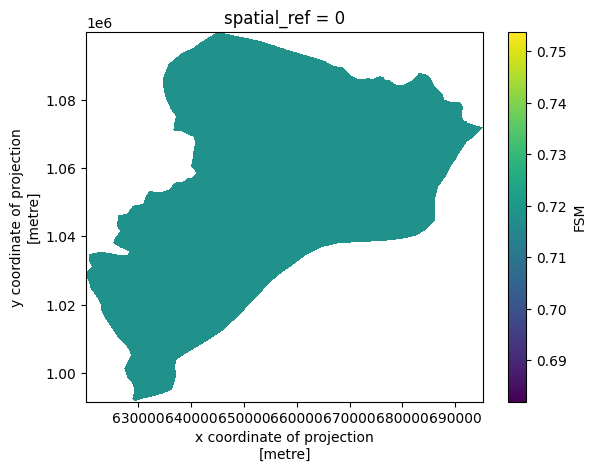

In [36]:
out_grid.FSM.plot()

In [37]:
%matplotlib inline

import geocube
from geocube.api.core import make_geocube

geo_grid = make_geocube(
    vector_data=df,
    measurements=['FSM'],
    resolution=(-12.5, 12.5)
)

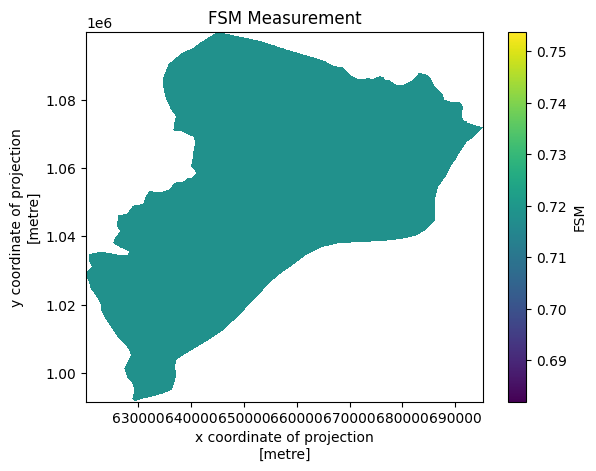

In [38]:
import matplotlib.pyplot as plt

# Set the backend to inline for Jupyter Notebook
%matplotlib inline

# Plot the 'FSM' measurement directly from the GeoCube
geo_grid.FSM.plot(cmap='viridis')  # Adjust the colormap as needed
plt.title('FSM Measurement')
plt.show()